# Clustering

Clustering o agrupamiento es una estrategia de aprendizaje no supervisado en el cual se agrupan elementos que presentan características **similares**.

### Ejemplo:

Tenemos los siguientes serer vivos:
* vaca
* calamar
* perro
* sepia
* petunia
* ornitorrinco
* abeto
* naranjo

Queremos clasificarlos en **3 grupos** basándonos en sus características. Una posible clasificación sería:
* Grupo 1: vaca, perro, ornitorrinco
* Grupo 2: calamar, sepia
* Grupo 3: abeto, naranjo, petunia

Podemos hacer una clasificación jerárquica basada en similitudes:


![](img/organismos.png)

## Distancias

Antes de podes agrupar elementos por su similitud tenemos que definir la *similitud*. Para ello vamos a crear una media de la diferencia, de como de separados están dos elementos del grupo. Ejemplos de distancias:
* Distancia Euclídea: $L_2$=$\left \|  \vec{a}-\vec{b} \right \|_2 = \sqrt{\sum_i \left ( a_i-b_i \right )^2}$
* Distancia Manhattan: $L_1$=$\left \|  \vec{a}-\vec{b} \right \| =  \sum_i \left \| a_i-b_i \right \| $
* Distancia Minkowsky: $\left \|  \vec{a}-\vec{b} \right \|_p = \left ( \sum_i \mid a_i-b_i \mid^p \right )^\frac{1}{p}$
![](img/distancia.png)

Distancia con textos:
* Distancia Hamming: La distancia de hamming entre dos cadenas de igual longitud es el número de posiciones en el cual los simbolos son diferentes.
* Distancia Levenshtein: La distancia Levenshtein entre dos palabras es el mínimo número de ediciones de un solo caracter (inserción, eliminación o sustitución) para que las dos palabras sean iguales.


Más sobre distancias:

https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa

## Métodos de clustering

### Particionado

#### K-means

Se basa en centroides. El centroide o centro geométrico es el punto resultante de la media aritmética de la posición de todos los puntos.


```
1 - elige k centroides al azar
2 - asigna el elemento al centroide más cercano
3 - recalcular centroides
4 - Repetir desde 2 mientras los centroides se sigan actualizando.
```

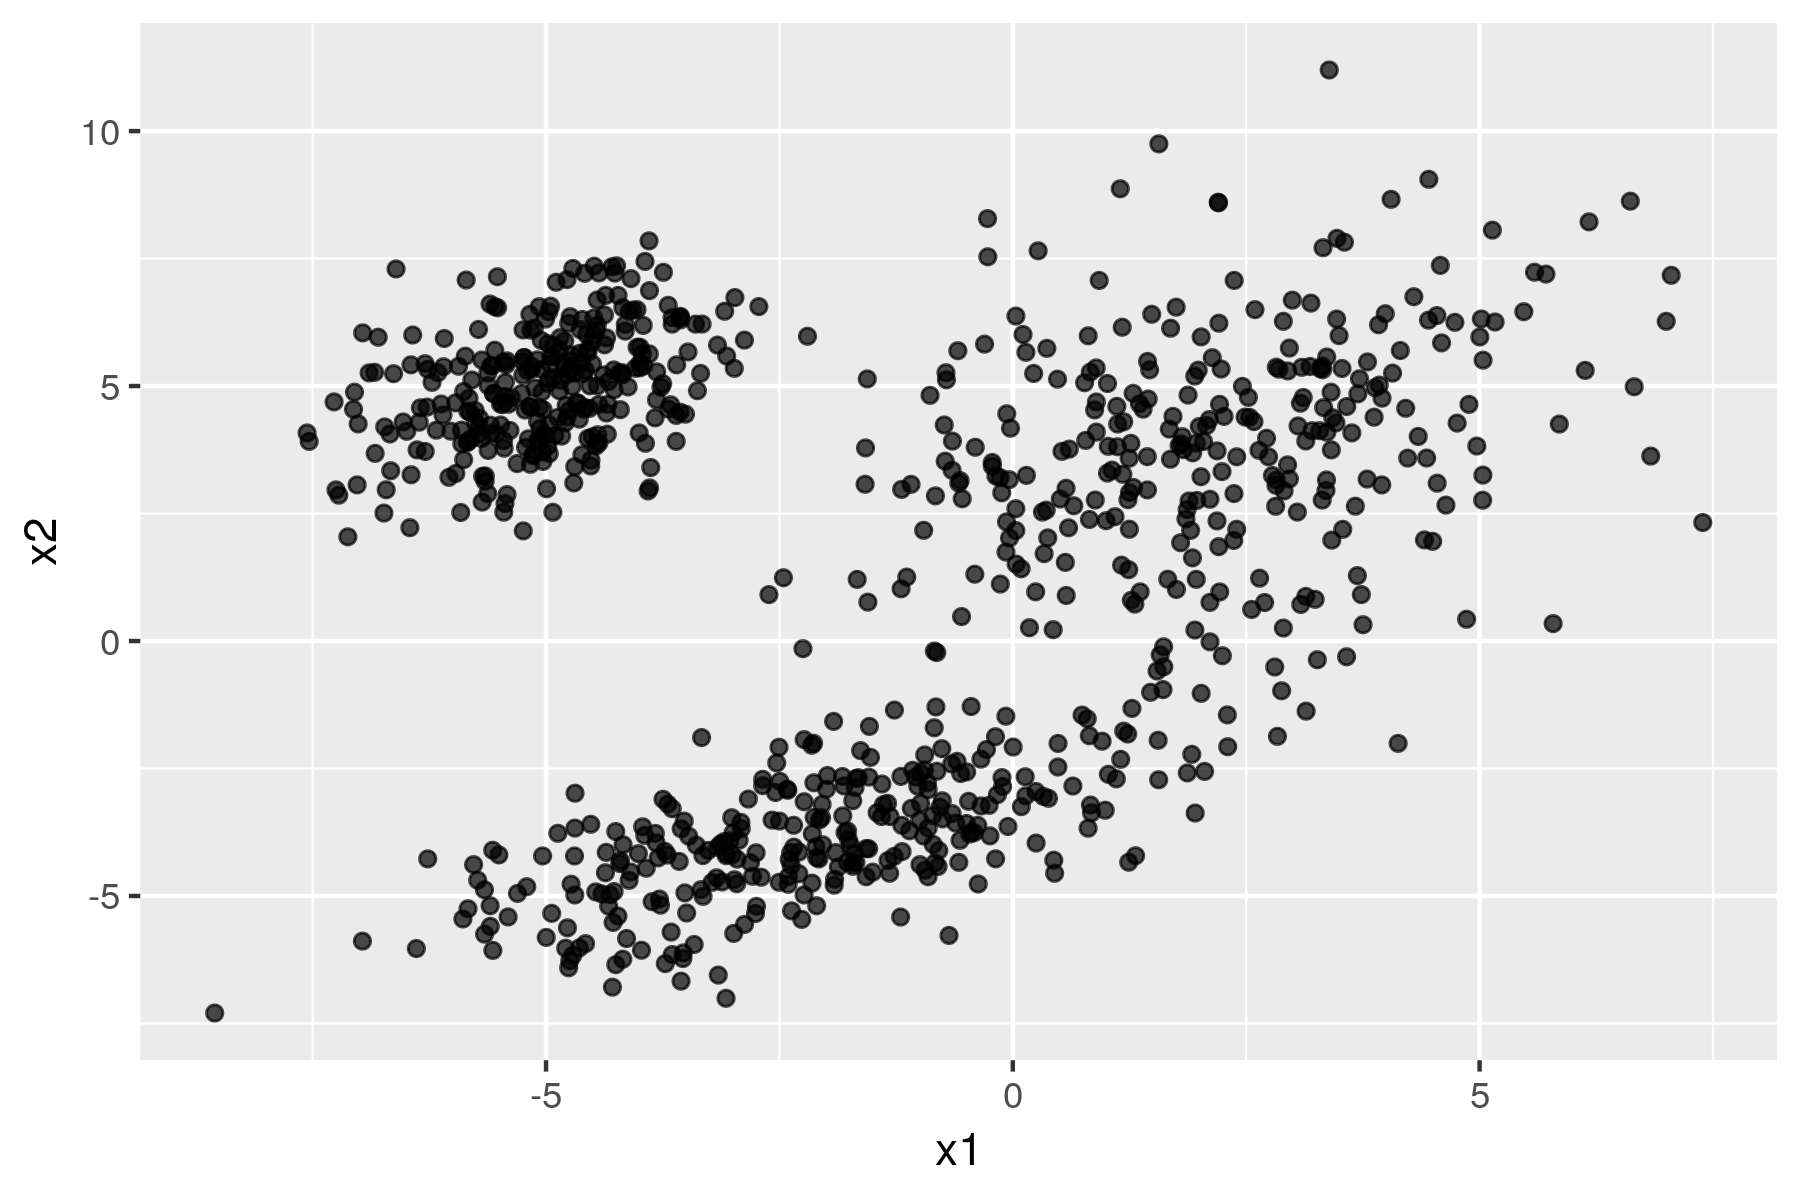

In [2]:
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)


N<-300
x1<-c(rnorm(N,mean=2,sd=2),rnorm(N,mean=-2,sd=2),rnorm(N,mean=-5,sd=1))
x2<-c(0.4*x1+c(rnorm(N,mean=3,sd=2),rnorm(N,mean=-3,sd=1),rnorm(N,mean=7,sd=1)))
df<-data.frame(x1,x2)

library(ggplot2)
ggplot(data=df, aes(x=x1,y=x2))+geom_point(alpha=0.7)

x1,x2
<dbl>,<dbl>
-4.963897,4.938636
-1.935584,-3.607052
2.277779,4.074804


x1,x2
<dbl>,<dbl>
-4.971633,4.951886
-2.071004,-3.743175
2.230681,3.888970


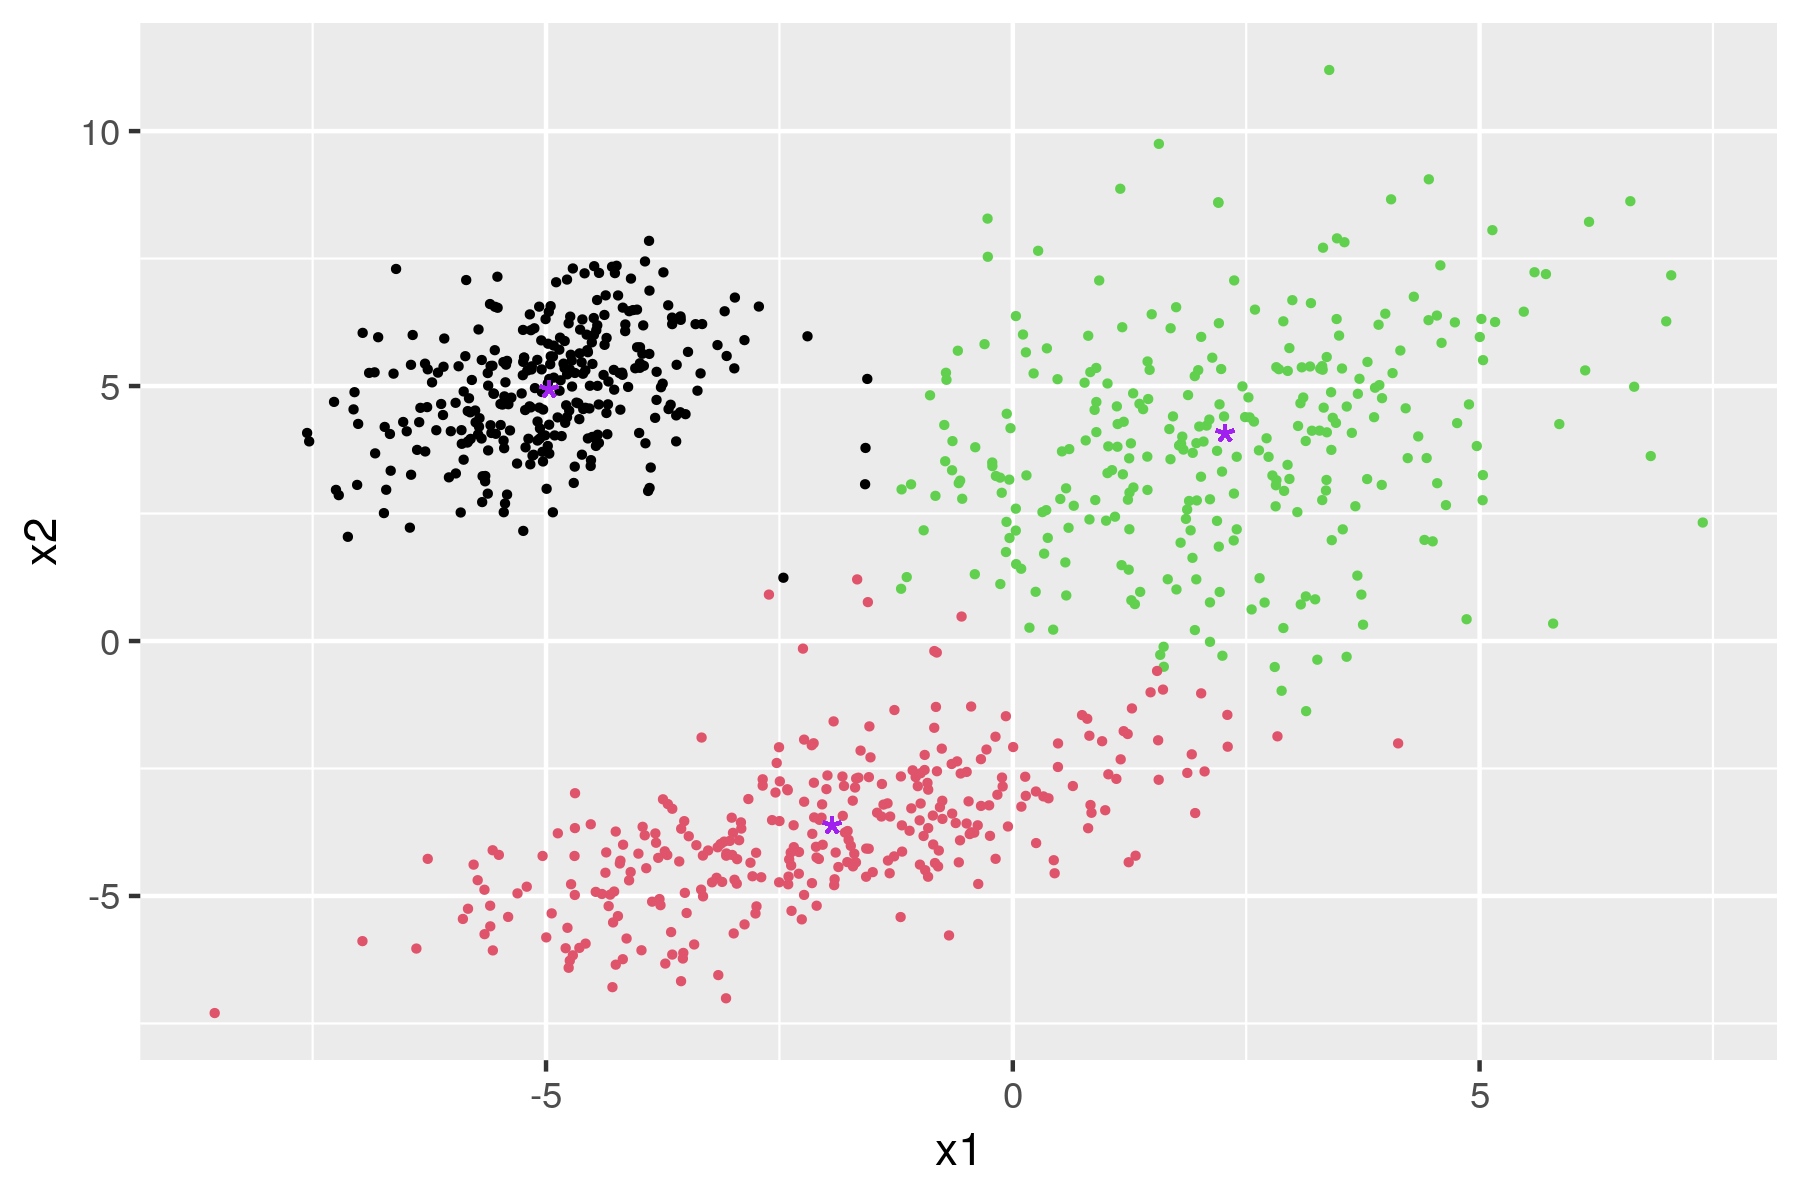

In [21]:
mydistance<-function(v1,v2){
        sqrt((v1[1]-v2[1])^2+(v1[2]-v2[2])^2)
}

assign_points_to_centroid<-function(mydata,centroids){        
    group<-rep(NA,nrow(mydata))
    for (i in 1:nrow(mydata)){
        distance_to_centroids<-rep(NA,nrow(centroids))
        for (j in 1:nrow(centroids)){
            distance_to_centroids[j]<-mydistance(mydata[i,],centroids[j,])
        }        
        group[i]<-which.min(distance_to_centroids)
    }   
    group
}

get_new_centroids<-function(mydata,group){
    k<-length(unique(group))
    centroids<-data.frame(x1=rep(NA,k),x2=rep(NA,k))
    for (i in 1:k){
        idx<-which(i == group)        
        centroids[i,]<-colMeans(mydata[idx,])
    }
    centroids
}

plot_all<-function(mydata,centroids,group){
    mydata$group<-factor(group)
    mydata$centroidx1<-centroids$x1[group]
    mydata$centroidx2<-centroids$x2[group]
    ggplot(data=mydata,aes(x=x1,y=x2))+geom_point(color=group,size=0.5)+
        geom_point(aes(x=centroidx1,y=centroidx2),shape="*",size=5,color="purple")
}


#centroids<-data.frame(x1=c(1,2),x2=c(1,1))
#centroids<-data.frame(x1=c(1,2,3),x2=c(1,1,1))
centroids
group<-assign_points_to_centroid(df,centroids)
plot_all(df,centroids,group)

centroids<-get_new_centroids(df,group)
centroids

Este algorimo lo implementa R:
```
kmeans(data.frame, k)
```

In [30]:
myclust<-kmeans(df,3)
print("Los centroides son")
myclust$centers
#myclust$cluster

[1] "Los centroides son"


,x1,x2
1,-2.121296,-3.813689
2,-4.975021,4.944769
3,2.198177,3.812967


In [31]:
myclust$centers[,"x2"]

1         2         3 
-3.813689  4.944769  3.812967

In [32]:
str(myclust)

List of 9
 $ cluster     : int [1:900] 3 3 3 3 3 3 3 3 3 3 ...
 $ centers     : num [1:3, 1:2] -2.12 -4.98 2.2 -3.81 4.94 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "1" "2" "3"
  .. ..$ : chr [1:2] "x1" "x2"
 $ totss       : num 26273
 $ withinss    : num [1:3] 1681 751 2350
 $ tot.withinss: num 4781
 $ betweenss   : num 21492
 $ size        : int [1:3] 304 304 292
 $ iter        : int 3
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [33]:
table(myclust$cluster)
#myclust$cluster


  1   2   3 
304 304 292 

In [36]:
cl<-factor(myclust$cluster)

clustered<-cbind(df,group=cl)
clustered$centroidx1<-myclust$centers[group,"x1"]
clustered$centroidx2<-myclust$centers[group,"x2"]


head(clustered)

,x1,x2,group,centroidx1,centroidx2
,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
1,1.966657,3.8801523,3,2.198177,3.812967
2,-0.548870,0.4799724,3,-4.975021,4.944769
3,1.997451,4.2064730,3,2.198177,3.812967
4,0.178238,0.2611485,3,2.198177,3.812967
5,-1.196541,1.0245357,3,2.198177,3.812967
6,1.172165,6.1536282,3,2.198177,3.812967


       x1               x2         group     centroidx1       centroidx2    
 Min.   :-8.549   Min.   :-7.296   1:304   Min.   :-4.975   Min.   :-3.814  
 1st Qu.:-4.623   1st Qu.:-2.933   2:304   1st Qu.:-4.975   1st Qu.:-3.814  
 Median :-2.132   Median : 3.265   3:292   Median :-2.121   Median : 3.813  
 Mean   :-1.684   Mean   : 1.619           Mean   :-1.732   Mean   : 1.627  
 3rd Qu.: 1.130   3rd Qu.: 5.115           3rd Qu.: 2.198   3rd Qu.: 4.945  
 Max.   : 7.391   Max.   :11.198           Max.   : 2.198   Max.   : 4.945  

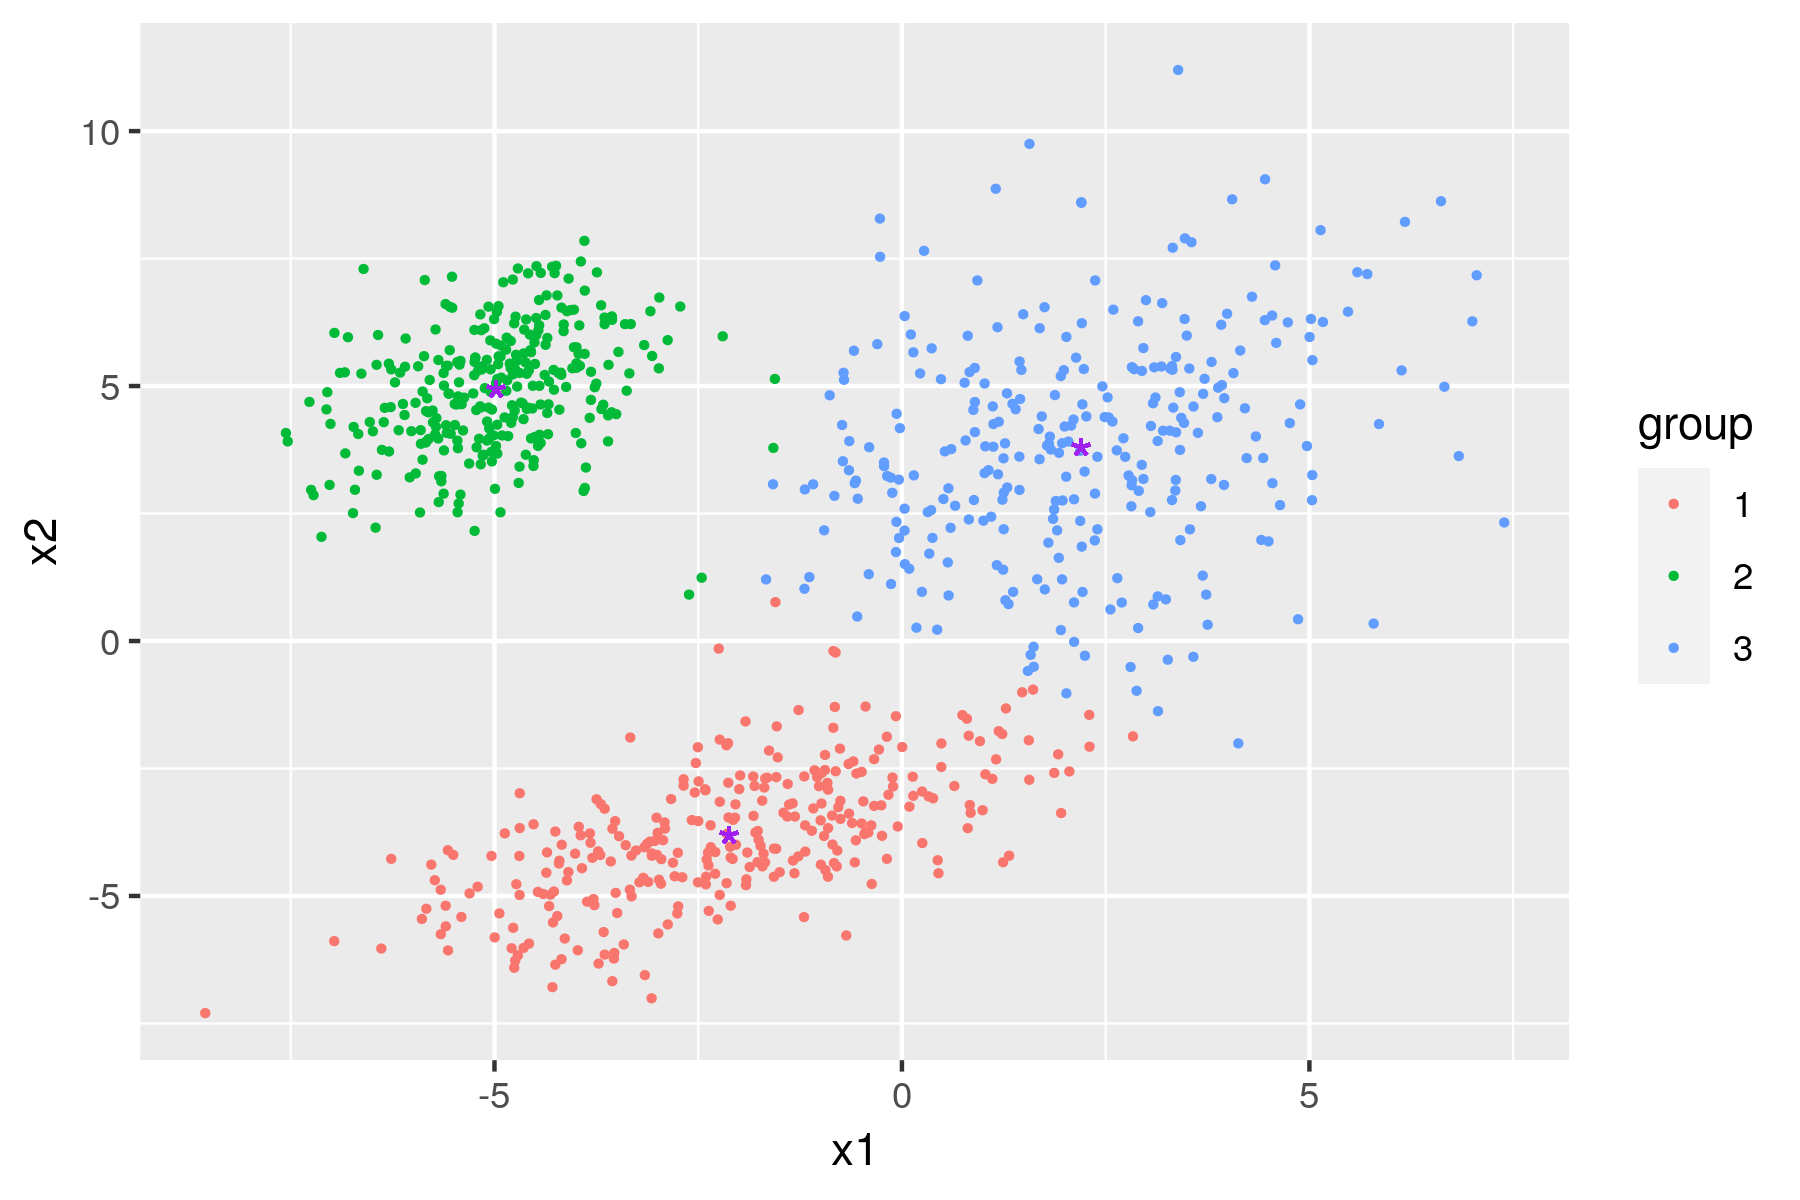

In [37]:
ggplot(data=clustered,aes(x=x1,y=x2))+
     geom_point(aes(color=group),size=0.5)+
    geom_point(aes(x=centroidx1,y=centroidx2),shape="*",size=5,color="purple")

summary(clustered)

### Medidas de la calidad de un cluster

Un cluster tiene que cumplir dos propiedades:
* Los elementos dentro de un mismo grupo tienen que estar lo más cerca posible entre si. La distancia media *intracluster* tiene que ser baja.
![](img/intragrupo.png)

* Los elementos de distintos grupos tienen que estar lo más lejos posibles uno de otro. La distancia media *intercluster* tiene que ser alta.
![](img/intergrupo.png)


Una forma de medirlo es con el SSE (Sum Square Errors).

* $SSE_{intra}$: Se define para cada grupo. Es la suma de distancias al cuadrado entre los puntos de un cluster y el centroide.
* $SSE_{inter}$: Se define para todos. Es la suma de las distancias al cuadrado entre los centroides de un cluster (ponderado al número de elementos del cluster) y el centroide de los centroides.
* $SSE_{total}$: $SSE_{inter}$+$\sum SSE_{intra}$

Una forma de medir la calidad de un cluster es el ratio:
\\[
\frac{SSE_{inter}}{SSE_{total}}
\\]
Cuanto más cercano a 1, mejor es la división entre clusters

In [38]:
paste("SSE intra:", paste(round(myclust$withinss),collapse=", "))
paste("SSE inter:", myclust$betweenss)
paste("SSE total:", myclust$totss)
paste("SSE total:", sum(myclust$withinss)+myclust$betweenss)

[1] "SSE intra: 1681, 751, 2350"

[1] "SSE inter: 21491.8131148816"

[1] "SSE total: 26273.2619128964"

[1] "SSE total: 26273.2619128964"

In [39]:
sse_per_cluser<-function(mydata_all,group,centroids){
    ssq<-rep(NA,nrow(centroids))
    for (k in 1:nrow(centroids)){
        mydata<-mydata_all[group==k,]
        h<-0
        for (i in 1:nrow(mydata)){            
            h<-h+sum((mydata[i,]-centroids[k,])^2)
        }        
        ssq[k]<-h
    }
    ssq
}
#sse_per_cluser(df,group,centroids)
sse_per_cluser(df,myclust$cluster,myclust$centers)

[1] 1680.5426  750.7127 2350.1935

In [40]:
sse_betweeness<-function(group,centroids){
    sum((centroids[group,1]-mean(centroids[group,1]))^2)+
    sum((centroids[group,2]-mean(centroids[group,2]))^2)
}
#sse_betweeness(group,centroids)
sse_betweeness(myclust$cluster,myclust$centers)

[1] 21491.81

### Determinando el número óptimo de clusters para k-means

No existe una regla fija para determinar el número de grupos. Podemos pintar como evoluciona el error cuadrádico y cuando deje de mejorar rápidamente establecer como el número de clusters.

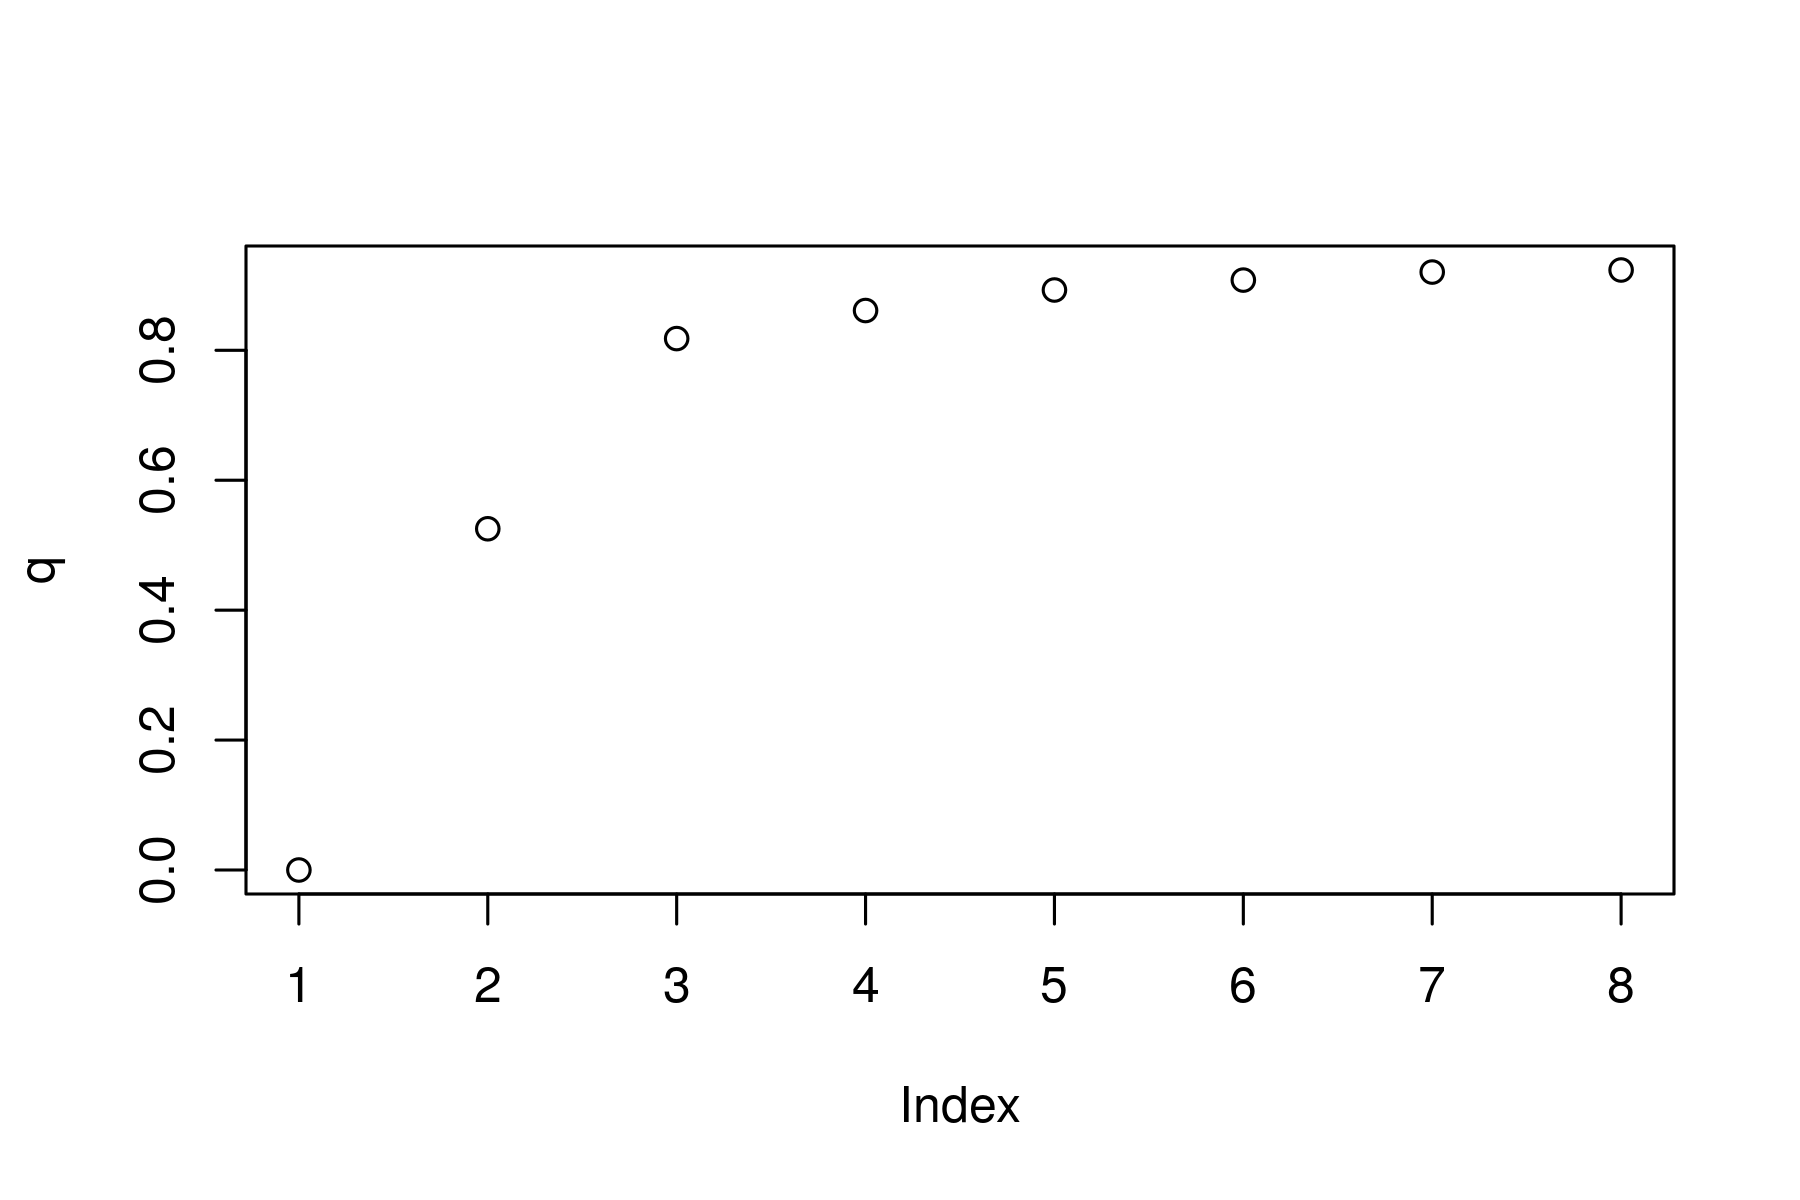

In [41]:
q<-c()
for (k in 1:8){
    myclust<-kmeans(df,k)
    q[k]<-myclust$betweenss/myclust$totss
}
plot(q)

Otra forma es mirando $\sum SSE_{intra}$:

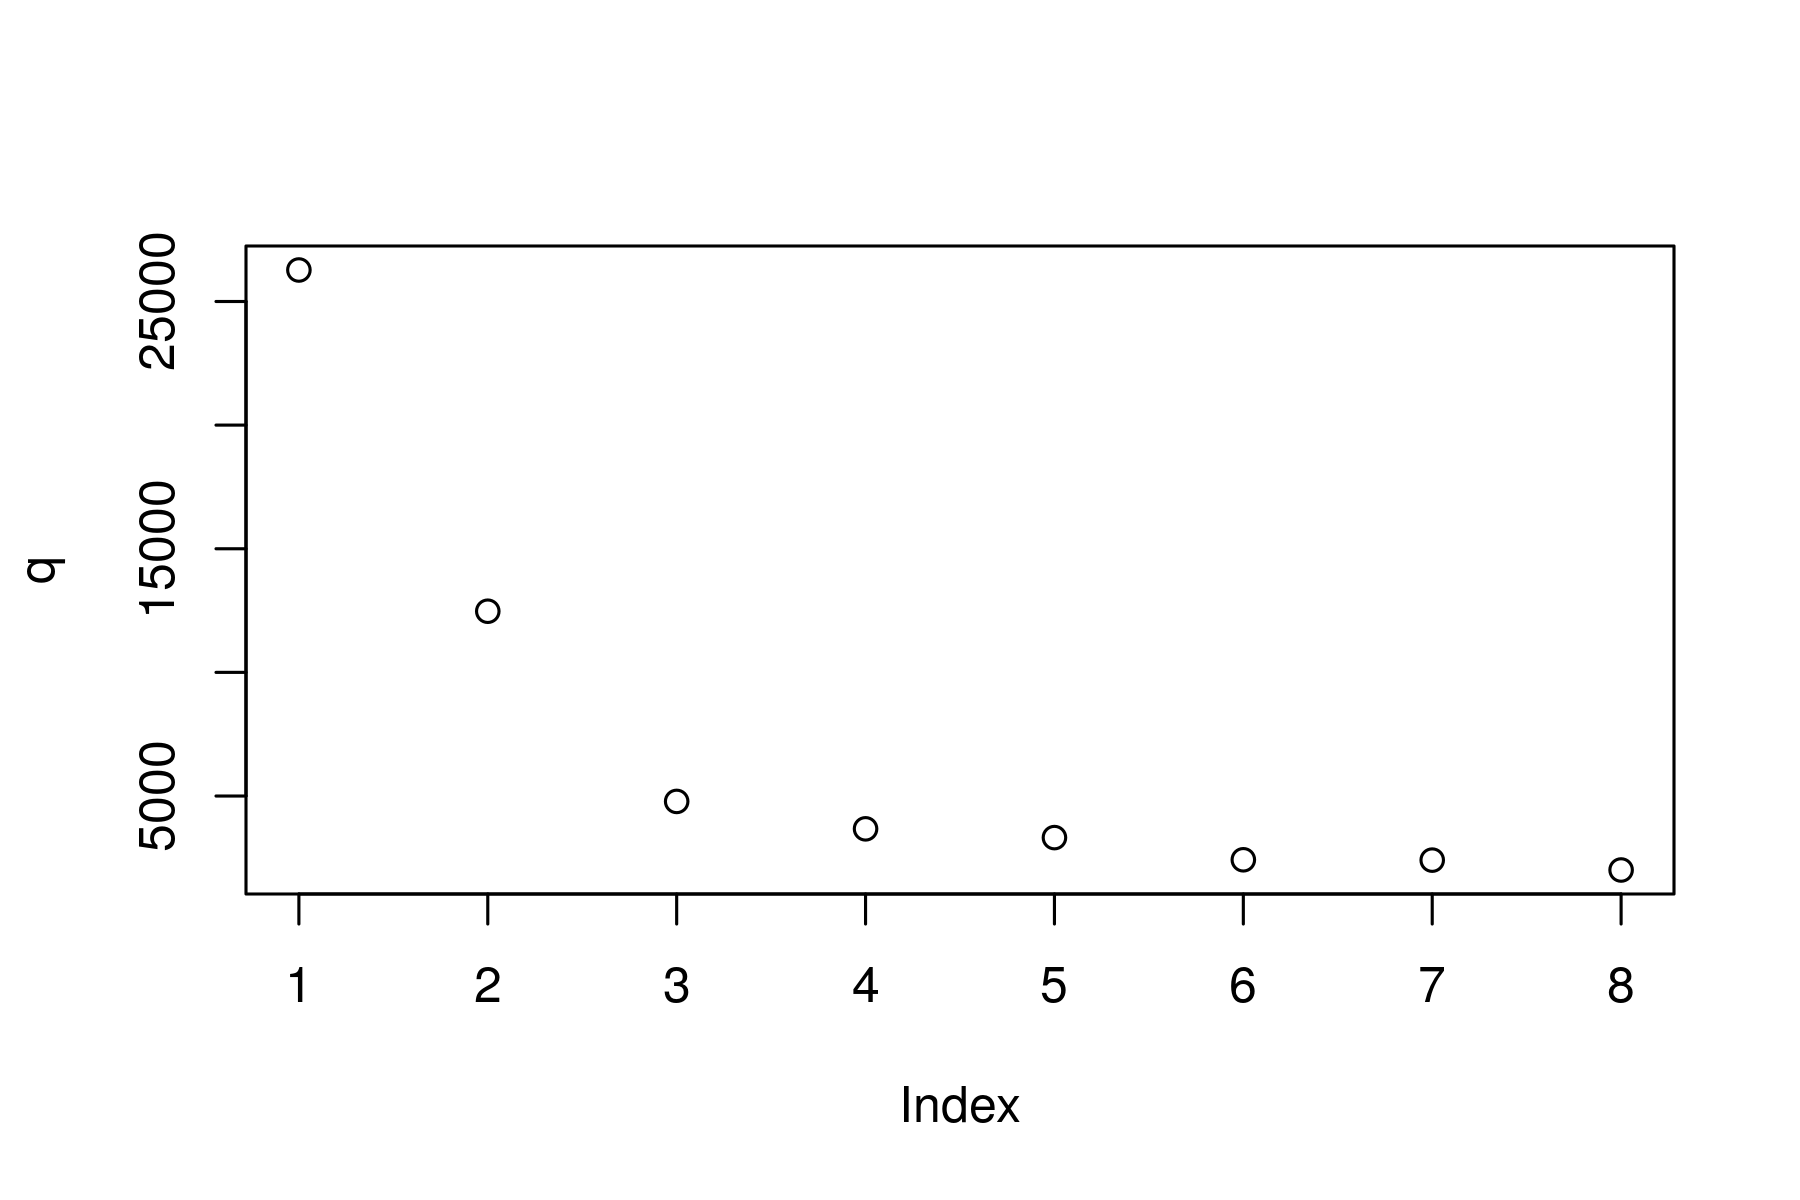

In [42]:
q<-c()
for (k in 1:8){
    myclust<-kmeans(df,k)
    q[k]<-sum(myclust$withinss)
}
plot(q)

#### Ejemplo Iris

Conjunto de datos de iris (de Fisher o Anderson) da las medidas en centímetros de las variables longitud y ancho del sépalo y longitud y ancho del pétalo, respectivamente, para 50 flores de cada una de las 3 especies de iris. Las especies son Iris setosa, versicolor y virginica.

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

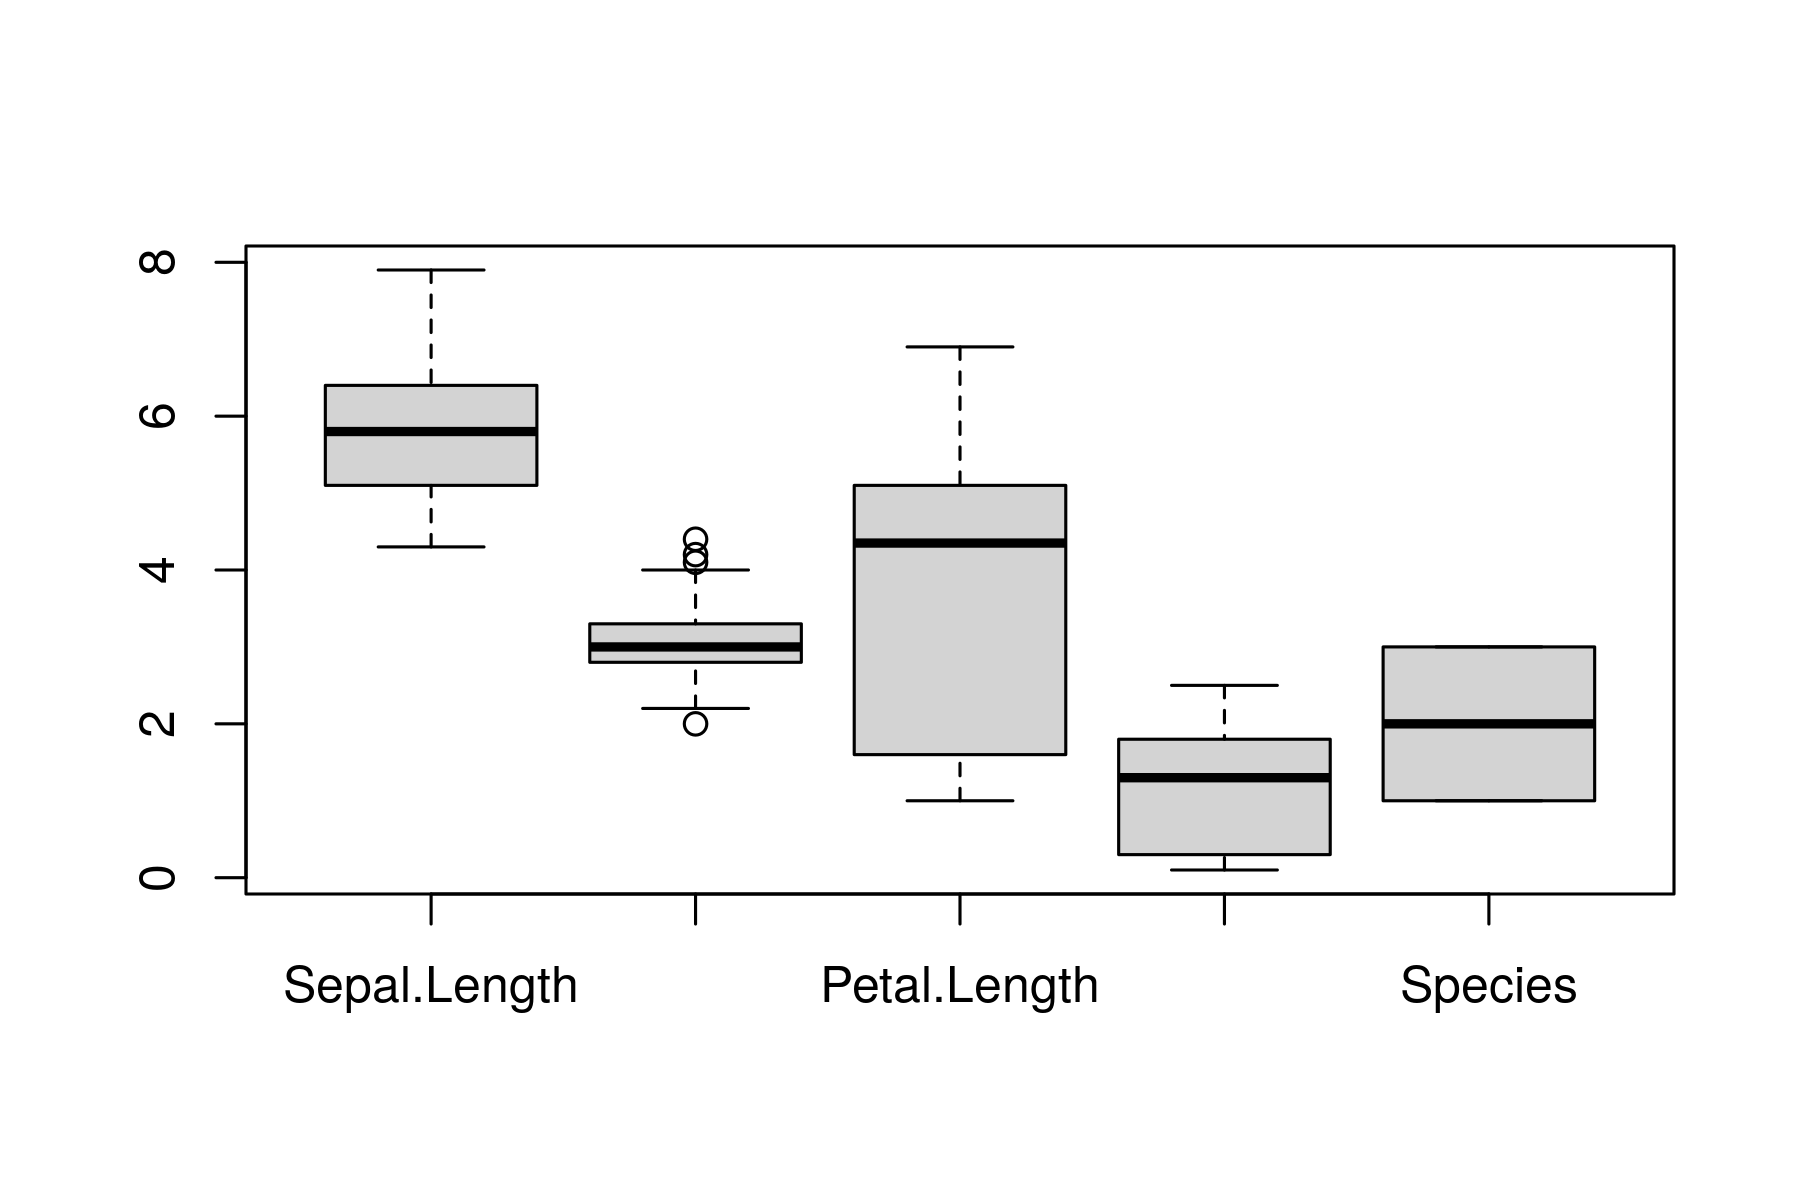

In [43]:
boxplot(iris)
summary(iris)

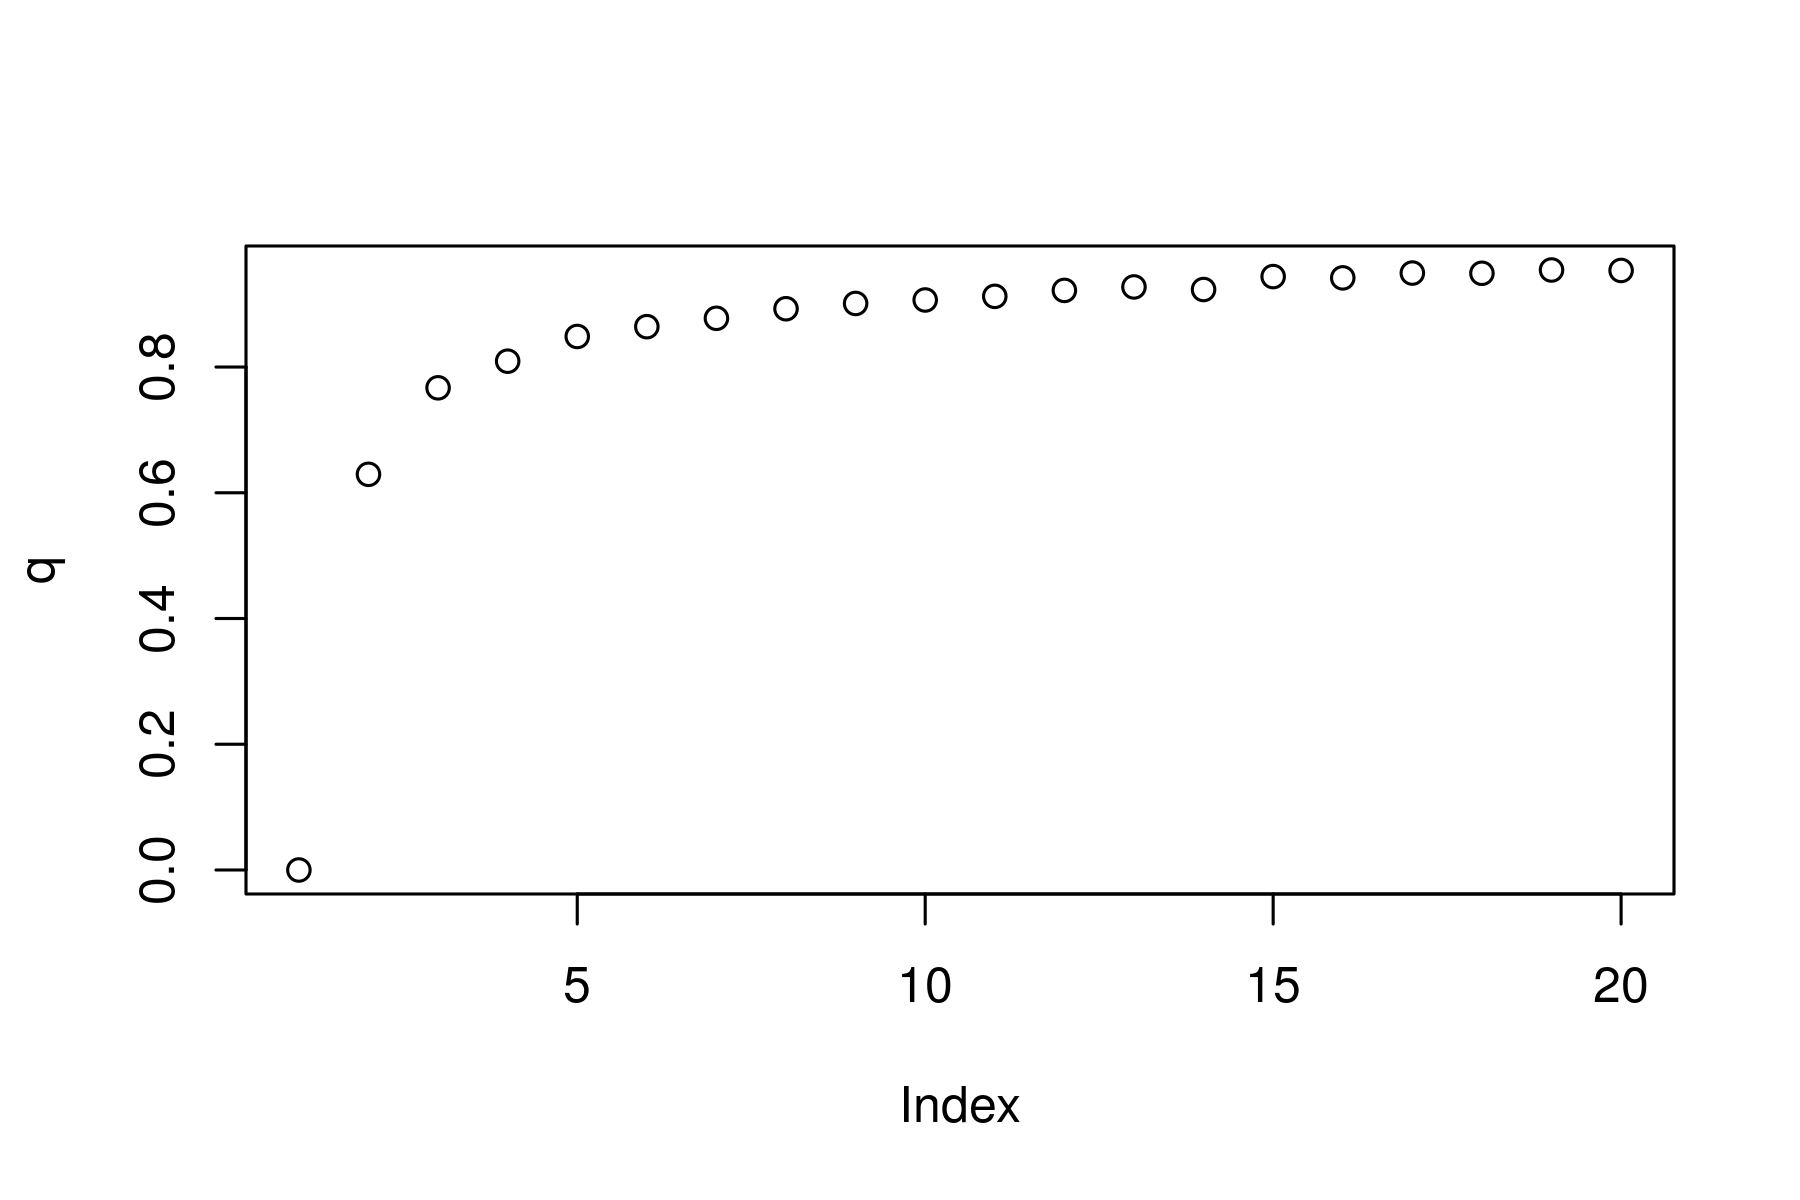

In [44]:
iris_data<-iris[,1:4]

for (i in 1:ncol(iris_data)){     
    mn<-mean(iris_data[,i],na.rm = T)
    sd<-sd(iris_data[,i],na.rm = T)
    
    iris_data[,i]<-(iris_data[,i]-mn)/sd    
}
q<-c()
for (k in 1:20){
    myclust<-kmeans(iris_data,k)
    q[k]<-myclust$betweenss/myclust$totss
}
plot(q)

In [47]:
myclust<-kmeans(iris_data,3)
#cbind(iris,cl=myclust$cluster)
table(iris$Species,myclust$cluster)

            
              1  2  3
  setosa      0 50  0
  versicolor 11  0 39
  virginica  36  0 14

#### Ejemplo proteinas


https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression

El conjunto de datos consiste en los niveles de expresión de 77 proteínas / modificaciones de proteínas que produjeron señales detectables en la fracción nuclear de la corteza. Hay 38 ratones de control y 34 ratones trisómicos (síndrome de Down), para un total de 72 ratones. En los experimentos, se registraron 15 mediciones de cada proteína por muestra / ratón. Por lo tanto, para los ratones de control, hay 38x15, o 570 mediciones, y para los ratones trisómicos, hay 34x15, o 510 mediciones. El conjunto de datos contiene un total de 1080 mediciones por proteína. Cada medida puede considerarse como una muestra / ratón independiente.

Las ocho clases de ratones se describen en función de características como el genotipo, el comportamiento y el tratamiento. Según el genotipo, los ratones pueden ser de control o trisómicos. Según el comportamiento, algunos ratones han sido estimulados para aprender (shock de contexto) y otros no (contexto de shock) y para evaluar el efecto del medicamento memantina en la recuperación de la capacidad de aprender en ratones trisómicos, algunos ratones han sido inyectado con la droga y otros no.

Clases
* c-CS-s: ratones de control, estimulados para aprender, inyectados con solución salina (9 ratones)
* c-CS-m: ratones de control, estimulados para aprender, inyectados con memantina (10 ratones)
* c-SC-s: ratones de control, no estimulados para aprender, inyectados con solución salina (9 ratones)
* c-SC-m: ratones de control, no estimulados para aprender, inyectados con memantina (10 ratones)

* t-CS-s: ratones con trisomía, estimulados para aprender, inyectados con solución salina (7 ratones)
* t-CS-m: ratones con trisomía, estimulados para aprender, inyectados con memantina (9 ratones)
* t-SC-s: ratones con trisomía, no estimulados para aprender, inyectados con solución salina (9 ratones)
* t-SC-m: ratones con trisomía, no estimulados para aprender, inyectados con memantina (9 ratones)



In [ ]:
mouse<-read.csv("data/Data_Cortex_Nuclear.csv")
mouse_data<-mouse[,2:78]

In [ ]:
boxplot(mouse_data)

In [ ]:
for (i in 1:ncol(mouse_data)){        
    mn<-mean(mouse_data[,i],na.rm = T)    
    mouse_data[is.na(mouse_data[,i]),i]<-mn        
}

In [ ]:
library(caret)

In [ ]:
preProcValues <- preProcess(mouse_data, method = c("center", "scale"))
preProcValues

In [ ]:
mouse_data_transformed <- predict(preProcValues, mouse_data)
boxplot(mouse_data_transformed[,1:10])

In [ ]:
q<-c()
for (k in 1:20){
    myclust<-kmeans(mouse_data_transformed,k)
    q[k]<-myclust$betweenss/myclust$totss
}
plot(q)

In [ ]:
myclust<-kmeans(mouse_data_transformed,8)
table(mouse$class,myclust$cluster)

In [ ]:
myclust<-kmeans(mouse_data_transformed,9)
table(mouse$class,myclust$cluster)
table(mouse$Genotype,myclust$cluster)
table(mouse$Treatment,myclust$cluster)
table(mouse$Behavior,myclust$cluster)

### Más medidas de calidad de un cluster (ASW)

Average silhouette width (ASW)

La medida de *silhouette* nos dice como de similar es un objeto a su propio cluster (cohesión) comparado con otros clusters (separación).

Su valor va entre:
* -1 : La muestra no se parece demasiado a sus vecinos y se diferencia poco de las de otro cluster
* 1  : La muestra se parece mucho a sus vecinos y muy poco a las de otro cluster

Se da un valor por muestra, si la mayor parte de las muestras tienen un valor alto entonces la configuración del cluster es buena.

Su valor s(i) se calcula como:


\\[
s(i)=\frac{b(i)-a(i)}{max \left ( a(i), b(i) \right )}
\\]

donde a(i) es la media de la distancia entre i y todos los puntos de su mismo cluster: 

\\[
a(i)=\frac{1}{\mid C(i) \mid -1 } \sum_{x \in C(i)} d(x_i,x)
\\]


y b(i) es la distancia media de *i* al cluster más parecido (el que tiene una menor distancia media):

\\[
b(i)=min_{j \notin C(i)} \frac{1}{\mid C(j) \mid } \sum_{x \in C(j)} d(x_i,x)
\\]

$C(i)$ es el cluster al cual *i* pertenece y $\mid C(i) \mid$ es el número de elementos en ese cluster.



In [ ]:
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)


N<-300
x1<-c(rnorm(N,mean=2,sd=2),rnorm(N,mean=-2,sd=2),rnorm(N,mean=-5,sd=1))
x2<-c(0.4*x1+c(rnorm(N,mean=3,sd=2),rnorm(N,mean=-3,sd=1),rnorm(N,mean=7,sd=1)))
df<-data.frame(x1,x2)

library(ggplot2)
ggplot(data=df, aes(x=x1,y=x2))+geom_point(alpha=0.7)

In [ ]:
library(cluster)

q<-c()
for (k in 2:8){
    myclust<-kmeans(df,k)
    ss<-silhouette(myclust$cluster, dist(df))    
    q[k]<-mean(ss[, "sil_width"])
}
plot(q)

In [ ]:
k<-3
myclust<-kmeans(df,k)
ss<-silhouette(myclust$cluster, dist(df))  
summary(ss)
plot(ss,col=1:k,border=NA)

In [ ]:
str(dist(iris_data))

In [ ]:
q<-c()
for (k in 2:20){
    myclust<-kmeans(iris_data,k)
    ss<-silhouette(myclust$cluster, dist(iris_data))    
    q[k]<-mean(ss[, "sil_width"])
}
plot(q)

In [ ]:
k<-2
myclust<-kmeans(iris_data,k)
ss<-silhouette(myclust$cluster, dist(iris_data))  
summary(ss)
plot(ss,col=1:k,border=NA)

table(iris$Species,myclust$cluster)

####  Ejemplo aceite de oliva


Composición en porcentaje de ocho ácidos grasos encontrados en 572 aceites de oliva italianos:

* region. Región de Italia.
* area. Área de Italy.
* palmitic. % de ácido palmítico en la muestra.
* palmitoleic. % de ácido palmitoleico en la muestra.
* stearic. % de ácido esteárico en la muestra.
* oleic. % de ácido oleico en la muestra.
* linoleic. % de ácido linoleico en la muestra.
* linolenic. % de ácido linolénico en la muestra.
* arachidic. % de ácido araquidónico en la muestra.
* eicosenoic. % de ácido eicosenoico en la muestra.

In [ ]:
library(dslabs)

In [ ]:
head(olive)

In [ ]:
library(GGally)
options(repr.plot.height=4,repr.plot.width=8,repr.plot.res = 300)
ggpairs(olive[,c("palmitic","palmitoleic","stearic","oleic","linoleic","linolenic","arachidic","eicosenoic")],
       lower = list(continuous = wrap("points", alpha = 0.3,size=0.1,color='blue'))
       )

In [ ]:
standarized_model <- caret::preProcess(olive, method = c("center", "scale"))
standarized_model

In [ ]:
olive_standarized = predict(standarized_model,olive)

In [ ]:
summary(olive_standarized)

In [ ]:
colMeans(olive_standarized[,3:10])

In [ ]:
sapply(olive_standarized[,3:10],sd)

In [ ]:
library(cluster)

q<-c()
qsil<-c()
data_olive<-olive_standarized[,3:10]
for (k in 2:20){
    myclust<-kmeans(data_olive,centers=k,nstart=30)
    q[k]<-myclust$betweenss/myclust$totss
    
    ss<-silhouette(myclust$cluster, dist(data_olive))    
    qsil[k]<-mean(ss[, "sil_width"])
}
plot(q)
plot(qsil)

In [ ]:
k<-5
myclust<-kmeans(olive_standarized[,3:10],centers=k,nstart=30)

In [ ]:
olive$cluster=factor(myclust$cluster)
summary(olive)

In [ ]:
ss<-silhouette(myclust$cluster, dist(olive_standarized[,3:10]))
plot(ss,col=1:k,border=NA)

In [ ]:
suppressMessages(library(dplyr))
olive %>% filter(cluster==1) %>% summary()

In [ ]:
olive %>% filter(cluster==2) %>% summary()

In [ ]:
olive %>% filter(cluster==3) %>% summary()

In [ ]:
olive %>% filter(cluster==4) %>% summary()

In [ ]:
olive %>% filter(cluster==5) %>% summary()

#### PAM (Partitioning Around Medoids) - k-medoids

Se basa en medoides. Es similar al kmeans pero en lugar de usar centroides se basa en medoides El centroide o centro geométrico es el punto resultante de la media aritmética de la posición de todos los puntos.


```
1 - elige k muestras al azar entre todas las muestras
2 - asigna el elemento al medoide más cercano
3 - recalcular medoides:
3.1 - Calcula la suma de la distancia de cada candidato a medoide con el resto de los puntos.
3.2 - Elije como medoide el punto cuya suma de las distancias sea menor.
4 - Repetir desde 2 mientras los medoides se sigan actualizando y el error siga disminuyendo.
```

El ligeramente más robusto que el kmeans porque este depende de la suma de elementos, no de la suma al cuadrado.

Funciona con definiciones de medidas arbitrarias.

https://www.rdocumentation.org/packages/cluster/versions/2.1.0/topics/pam

In [ ]:
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)


N<-300
x1<-c(rnorm(N,mean=2,sd=2),rnorm(N,mean=-2,sd=2),rnorm(N,mean=-5,sd=1))
x2<-c(0.4*x1+c(rnorm(N,mean=3,sd=2),rnorm(N,mean=-3,sd=1),rnorm(N,mean=7,sd=1)))
df<-data.frame(x1,x2)

library(ggplot2)
ggplot(data=df, aes(x=x1,y=x2))+geom_point(alpha=0.7)

In [ ]:
cl <- factor(pam(df,k=3, cluster.only=TRUE))

clustered<-cbind(df,group=cl)
summary(clustered)
ggplot(data=clustered,aes(x=x1,y=x2,color=group))+geom_point(size=0.5)

In [ ]:
pam_cl<-pam(df,k=3, metric="manhattan")
pam_cl$medoids

In [ ]:

cl<-factor(pam_cl$clustering)

clustered<-cbind(df,group=cl)
summary(clustered)
ggplot(data=clustered,aes(x=x1,y=x2,color=group))+geom_point(size=0.5)+
 geom_point(x=pam_cl$medoids[1,1],y=pam_cl$medoids[1,2],color="black",shape='O',size=3)+
 geom_point(x=pam_cl$medoids[2,1],y=pam_cl$medoids[2,2],color="black",shape='O',size=3)+
 geom_point(x=pam_cl$medoids[3,1],y=pam_cl$medoids[3,2],color="black",shape='O',size=3)

In [ ]:
pr<-pam(df,k=3, metric="manhattan")
str(pr)

In [ ]:
silhouette(pr)

#### Ejemplo con mouse_data

In [ ]:
mouse<-read.csv("data/Data_Cortex_Nuclear.csv")
mouse_data<-mouse[,2:78]

preProcValues <- caret::preProcess(mouse_data, method = c("center", "scale"))
mouse_data_transformed <- predict(preProcValues, mouse_data)

qsil<-c()
for (k in 2:20){
    pr<-pam(mouse_data_transformed,k=k, metric="manhattan")
    ss<-silhouette(pr)
    qsil[k]<-mean(ss[, "sil_width"])
}
plot(qsil)

In [ ]:
k<-4
pr<-pam(mouse_data_transformed,k=k, metric="manhattan")
ss<-silhouette(pr)
plot(ss,col=1:k,border=NA)

In [ ]:
table(mouse$class,pr$cluster)
table(mouse$Genotype,pr$cluster)
table(mouse$Treatment,pr$cluster)
table(mouse$Behavior,pr$cluster)

## Algoritmos jerárquicos

Se basa en la idea central de que los objetos están más relacionados con objetos cercanos que con objetos más alejados. Estos algoritmos conectan "objetos" para formar "clusters" en función de su distancia. Hay dos enfoques para abordar este problema de agrupamiento:

* Aglomerativo (de abajo arriba): cada elemento comienza en su propio clúster. Iterativamente, los clústeres más similares se fusionan para finalizar con un gran clúster que contiene todos los elementos.
* Divisivo (de arriba hacia abajo): todos los elementos pertenecen al mismo grupo. Este clúster se divide iterativamente hasta que todos los clusters tengan solo un elemento.

La fusión o división de clusters se realiza en base a diferentes métodos para medir estas similitudes de clusters:

* single-linkage (SLCA): la distancia entre dos clusters es la distancia mínima que existe entre dos elementos que pertenecen a diferentes clusters.
![](img/cluster_single.png)
* complete-linkage (CLCA): la distancia entre dos clústeres es la distancia máxima que existe entre dos elementos que pertenecen a diferentes clústeres.
![](img/cluster_complete.png)
* average-linkage (unweighted pair group method with arithmetic mean, UPGMA): la distancia entre dos clusters es la distancia promedio que existe desde cualquier elemento en el primer clúster a cualquier elemento en el otro clúster.
![](img/cluster_average.png)
* cendroid-linkage (Unweighted pair group method with centroid, UPGMC): la distancia entre dos clusters es la distancia que existe entre los centroinds de cada cluster.
![](img/cluster_centroid.png)

### Ejemplo Iris

In [ ]:
iris_data<-iris[,1:4]

for (i in 1:ncol(iris_data)){     
    mn<-mean(iris_data[,i],na.rm = T)
    sd<-sd(iris_data[,i],na.rm = T)
    
    iris_data[,i]<-(iris_data[,i]-mn)/sd    
}

In [ ]:
d <- dist(as.matrix(iris_data),method = "euclidean")
hc <- hclust(d,method="complete")
hcd <- as.dendrogram(hc)
par(cex=0.3)
plot(hcd)

In [ ]:
iris$Species[labels(hcd)]

In [ ]:
library(dendextend)
options(repr.plot.height=8,repr.plot.width=6,repr.plot.res = 300)
labels(hcd)<-iris$Species[labels(hcd)]
hcd<-set(hcd,"labels_cex", 0.45) 
plot(color_branches(hcd,h=2),horiz=TRUE,cex=0)
abline(v=2,col="red")
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

In [ ]:
plot(cut(hcd, h = 2)$upper, main = "Corte", cex=1)

In [ ]:
cut(hcd, h = 2)$lower

In [ ]:
cutree(hc,h=2)

Podemos cortar el arbol a una altura dada y con cuales de las especies se correspondería:

In [ ]:
#d <- dist(as.matrix(iris_data),method = "euclidean")
#hc <- hclust(d,method="complete")
#hcd <- as.dendrogram(hc)

table(iris$Species,
      cutree(hc,h=2))

La función cutree_1h conserva el orden del dendrograma que hemos dibujado antes:

In [ ]:
table(iris$Species,
      cutree_1h.dendrogram(hcd,h=2))

In [ ]:
table(iris$Species,
      cutree_1h.dendrogram(hcd,h=5))

In [ ]:
table(iris$Species,
      cutree_1h.dendrogram(hcd,h=4.5))

#### Ejemplo proteinas del ratón

In [ ]:
d <- dist(as.matrix(mouse_data_transformed),method = "euclidean")

hc <- hclust(d,method="average")
hcd <- as.dendrogram(hc)
plot(hcd)

In [ ]:
plot(color_branches(hcd, k=8),leaflab="none")

In [ ]:
plot(cut(hcd, h = 15)$lower[[2]], main = "Segunda rama del arbol con corte h=15")

In [ ]:
table(mouse$class,cutree(hc,k=3))

In [ ]:
table(mouse$class,cutree(hc,h=10))
table(mouse$Genotype,cutree(hc,22))
table(mouse$Treatment,cutree(hc,4))
table(mouse$Behavior,cutree(hc,4))

#### Ejemplo tipos de aceite

In [ ]:
standarized_model <- caret::preProcess(olive, method = c("center", "scale"))
olive_standarized = predict(standarized_model,olive)

In [ ]:
d <- dist(as.matrix(olive_standarized),method = "euclidean")

hc <- hclust(d,method="average")
hcd <- as.dendrogram(hc)
plot(color_branches(hcd, k=5),leaflab="none")
abline(h=4.42,col="red")

In [ ]:
hc$height[hc$height>=4.3]

In [ ]:
#cl<-cutree(hc,k=5)
cl<-cutree_1h.dendrogram(hcd,h=4.3)
olive$cluster = factor(cl)
summary(olive)

In [ ]:
ss<-silhouette(cl, d)
plot(ss,col=1:max(cl),border=NA)

In [ ]:
olive %>% filter(cluster==1) %>% summary()

In [ ]:
olive %>% filter(cluster==2) %>% summary()

In [ ]:
olive %>% filter(cluster==3) %>% summary()

In [ ]:
olive %>% filter(cluster==4) %>% summary()

In [ ]:
olive %>% filter(cluster==5) %>% summary()

#### Ejemplo expresión genética levadura

Ejemplo sacado de:
https://bio723-class.github.io/Bio723-book/clustering-in-r.html

Utilizando el dataset del artículo:
    Spellman PT, et al. 1998. Comprehensive identification of cell cycle-regulated genes of the yeast Saccharomyces cerevisiae by microarray hybridization. Mol Biol Cell 9(12): 3273-97.

Nos vamos a descargar la matriz de expresión de 724 genes en diferentes condiciones. Vamos a gruparlos por su similaridad

In [ ]:
#library(tidyverse)
spellman <- read.csv("https://github.com/Bio723-class/example-datasets/raw/master/spellman-wide.csv", stringsAsFactors = T)
head(spellman)

In [ ]:
summary(spellman)

In [ ]:
1-abs(cor(spellman[,c(-1,-2)],use="pairwise.complete.obs"))

Las dos primeras columnas indican el tipo de experimento que se ha realizado. Las siguientes columnas indican el nivel de expresión genética del gen en cuestión, indicado por la columna.
Por tanto cada columna, a partir de la tercera nos da los niveles de expresión de un gen en diferentes condiciones. Queremos encontrar los genes que muestran un comportamiento similar.

Como distancia ahora vamos a utilizar la correlación. Más concretamente: 1-cor
De esta forma si dos genes tienen correlación muy cercana a 1 tendrán una distancia muy cercana a 0. A menor correlación, mayor distancia.

In [ ]:
spellman.cor<-cor(spellman[,c(-1,-2)],use="pairwise.complete.obs")
dim(spellman.cor)

In [ ]:
spellman.dist<- as.dist(1 - abs(spellman.cor))
str(spellman.dist)

In [ ]:
spellman.tree <- hclust(spellman.dist, method="complete")
spellman.dend <- as.dendrogram(spellman.tree) 

In [ ]:
library(dendextend)

clusters <- cutree(spellman.dend, k=4)
plot(color_branches(spellman.dend, k=4),leaflab="none")

In [ ]:
library(cluster)
ss<-silhouette(clusters, spellman.dist)
plot(ss,col=1:max(clusters),border=NA)

In [ ]:
names(clusters[clusters==4])

# Cluster por densidad



## Density Based Clustering of Applications with Noise (DBSCAN)

DBSCAN es un algoritmo basado en la proximidad y la densidad de las observaciones para formar grupos. La agrupación DBSCAN puede identificar valores atípicos, observaciones que no pertenecerán a ningún grupo.

En DBSCAN hay 3 tipos de puntos:
 * núcleo: punto que tiene al menos *minPts* puntos a una distancia $\varepsilon$.
 * puntos (densamente-)alcanzables: punto que tiene al menos un núcleo a una distancia $\varepsilon$.
 * ruido:  El resto de puntos

Donde los parámetros $\varepsilon$ y *minPts* son:
  * $\varepsilon$: distancia de corte de un punto desde (punto central, que se analiza a continuación) para que se considere parte de un grupo. Comúnmente conocido como epsilon (abreviado como eps).
  *  *minPts* : número mínimo de puntos necesarios para formar un clúster.

La agrupación DBSCAN se puede resumir en los siguientes pasos:
  * Para cada punto P identifica los N puntos dentro de distancia $\varepsilon$ 
     * si N >= minPts : Etiqueta P como punto de tipo *núcleo*
     * si N < minPts : 
         * Si hay un punto de *núcleo* a una distancia $\varepsilon$, se etiqueta como *punto densamente alcanzable*
         * Si NO hay un punto de *núcleo* a una distancia $\varepsilon$, se etiqueta como *ruido*.
         
   Un cluster estaría formado por todos los puntos de *núcleo* y los puntos *densamente alcanzables* que están densamente conectados por la distancia  $\varepsilon$. 
   Existe una variante DBSCAN* la cual solo considera los puntos de cluster como puntos de *núcleo* el resto son ruido.

![](img/dbscan_1.png)
![](img/dbscan_2.png)

Ejemplo de clasificación de estrellas sacadas de:
http://burro.astr.cwru.edu/Academics/Astr221/HW/HW5/HW5.html

El dataset contiene 6219 estrellas que muestran la magnitud aparente en el rango visible. El dataset contiene 5 columnas:
* id de la estrella
* Magnitud aparente en el espectro visible
* Color observado en el rango B-V (Blue-Visible)
* Paralaje de la estrella observada (en segundo de arco)
* Incertidumbre del paralaje (en miliarcsec)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/04/ParsecDef.svg/240px-ParsecDef.svg.png)

Podemos calcular la distancia a la estrella en Parsecs en función de los segundos de arco:
\\[
\Delta=\frac{1}{\pi}
\\]
1 pársec = 206265 ua = 3,2616 años luz 

La magnitud absoluta de una estrella está relacionada con la magnitud aparente por:
\\[
Mv = mv– 5·log_{10} \Delta +5
\\]

Si pintamos la magnitud absoluta de una estrella en función de su temperatura (color) obtenemos lo que se llama un diagrama Hertzsprung–Russell, a veces abreviado como diagrama H-R.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/HRDiagram.png/421px-HRDiagram.png)

In [ ]:
hr=read.csv("data/yaletrigplx.dat",col.names = c("id","mv","BV","parallax","error"),sep="" )
head(hr)

In [ ]:
hr$parsec=1/hr$parallax
hr$Mv<-hr$mv-5*log10(hr$parsec)+5

In [ ]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

ggplot(hr,aes(y=Mv,x=BV))+geom_point(size=0.1)+scale_y_reverse()

In [ ]:
library(dbscan)
library(tidyverse)

In [ ]:
hr$norm_Mv=(hr$Mv-mean(hr$Mv))/sd(hr$Mv)
hr$norm_BV=(hr$BV-mean(hr$BV))/sd(hr$BV)

In [ ]:
summary(hr)

In [ ]:
hr_cl<-dbscan(hr[,c("norm_Mv","norm_BV")], minPts = 18,eps=0.09, borderPoints=TRUE)
hr_cl
hr$cluster<-as.factor(hr_cl$cluster)
ggplot(hr,aes(y=norm_Mv,x=norm_BV,color=cluster))+geom_point(size=0.01)+scale_y_reverse()

In [ ]:
hullplot(hr[,c("norm_Mv","norm_BV")],hr_cl)

kNNdist devuelve un vector con la distancia a los k elementos más cercanos de cada punto:

In [ ]:
k30_dist <- hr %>% select(norm_Mv,norm_BV) %>% kNNdist(k=30) 
head(cbind(hr,k30_dist))

El codo en la curva de lo valores de kNNdist nos puede dar una zona en la que el valor de eps de mejores resultados:

In [ ]:
plot(sort(kNNdist(hr[,c("norm_Mv","norm_BV")], k=30)),t='l')
grid()

In [ ]:
hr_cl<-dbscan(hr[,c("norm_Mv","norm_BV")], minPts = 30,eps=0.3, borderPoints=TRUE)
hr_cl
hr$cluster<-as.factor(hr_cl$cluster)
ggplot(hr,aes(y=norm_Mv,x=norm_BV,color=cluster))+geom_point(size=0.01)+scale_y_reverse()

### Ejemplo dataset Iris

In [ ]:
data(iris)

preproc<-caret::preProcess(iris[,1:4], method = c("center", "scale"))
iris_norm<-predict(preproc,iris[,1:4])
summary(iris_norm)

Buscamos el valor de eps mirando la distancia de cada muestra a sus 4 vecinos más próximos: 

In [ ]:
kNNdistplot(iris_norm, k=4)
grid()

In [ ]:
cl <- dbscan(iris_norm, eps = 0.6, minPts = 4)
pairs(iris_norm, col = cl$cluster+1L)

In [ ]:
df=data.frame(dist=kNNdist(iris_norm,k=4),
              cl=as.factor(cl$cluster),
              sp=iris$Species)
table(df$cl,df$sp)

In [ ]:
head(df)

In [ ]:
library(dplyr)
df %>% group_by(cl) %>% summarize(mean(dist))

## Hiercarchical DBSCAN (HDBSCAN)

HDBSCAN esencialmente calcula la jerarquía de todos los clústeres de DBSCAN* para un *minPts* dato, y luego utiliza una estabilidad basada método de extracción para encontrar cortes óptimos en la jerarquía, por lo tanto produciendo una solución plana.
      
Hay que tener en cuenta que *minPts* no solo actúa como un tamaño mínimo de clúster para detectar, pero también como un factor de suavizado de las estimaciones de densidad calculado implícitamente desde HDBSCAN.

https://cran.r-project.org/web/packages/dbscan/vignettes/hdbscan.html

In [ ]:
set.seed(123)
N<-1000
x<-c(rnorm(N,mean=1,sd=0.5),rnorm(N,mean=3.5,sd=0.5),rnorm(2*N,mean=8,sd=1))
df <- data.frame(x=x,y=runif(length(x)))
head(df)

In [ ]:
library(ggplot2)
options(repr.plot.height=2,repr.plot.width=6,repr.plot.res = 300)

ggplot(df,aes(x=x,y=y))+geom_point(size=0.1)+geom_density2d(h=c(1,2))

In [ ]:
ggplot(df,aes(x=x))+geom_density(bw=0.15)

In [ ]:
library(dbscan)
minPts <- 500

cl <- hdbscan(df[,c("x","y")], minPts = minPts,gen_simplified_tree=TRUE,gen_hdbscan_tree=TRUE)

HDBSCAN no es más que una ejecución de dbscan* para diferentes valores de epsilon.

Vamos a demostrarlo a continuación:

In [ ]:
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

plot(cl$hc)

In [ ]:
## cutree doesn't distinguish noise as 0, so we make a new method to do it manually 
cut_tree <- function(hcl, eps, core_dist){
  cuts <- cutree(hcl, h=eps)
  cuts[which(core_dist > eps)] <- 0 # Use core distance to distinguish noise
  cuts
}
core_dist <- kNNdist(df[,c("x","y")], k=cl$minPts-1)
plot(sort(core_dist),t='l')
options(repr.plot.height=2,repr.plot.width=6,repr.plot.res = 300)

In [ ]:
eps_value=0.7
#eps_value=1.2
#eps_value=1.5

cut_cl <- cut_tree(cl$hc, eps_value, core_dist)

dbscan_cl <- dbscan(df[,c("x","y")], eps = eps_value, minPts = minPts, borderPoints = F) # DBSCAN* doesn't include border points

(all.equal(rle(cut_cl)$lengths, rle(dbscan_cl$cluster)$lengths) == "TRUE")
# Ejemplo de como funciona rle
#c(rep(6:10, 1:5),6,6)
#rle(c(rep(6:10, 1:5),6,6))

In [ ]:
#cut_cl<-cutree(cl$hc, h=1.2)
table(cut_cl)
table(dbscan_cl$cluster)

In [ ]:

df$cluster<-factor(cut_cl)
#df$cluster<-factor(dbscan_cl$cluster)
ggplot(df,aes(x=x,y=y,color=cluster))+geom_point(size=0.1)

#### Estabilidad de clusters

In [ ]:
cl <- hdbscan(df[,c("x","y")], minPts = minPts,gen_simplified_tree=TRUE,gen_hdbscan_tree=TRUE)
cl

In [ ]:
df$cluster<-as.factor(cl$cluster)
options(repr.plot.height=2,repr.plot.width=6,repr.plot.res = 300)
ggplot(df,aes(x=x,y=y,color=cluster))+geom_point(size=0.1)

Para calcular la estabilidad definimos $\lambda=\frac{1}{\varepsilon}$. Suponiendo que vamos probando con valores $\varepsilon$ decrecientes, lo que equivale a $\lambda$ creciente. Para un cluster podemos definir los valores $\lambda_{birth}$ y $\lambda_{death}$ como el valor de $\lambda$ en el cual el cluster aparece (como división de un cluster mayor) y desaparece al dividirse en clusters más pequeños.

Podemos definir $\lambda_p$ como el valor en el intervalo $[\lambda_{birth},\lambda_{death}]$ en el cual el punto $p$ se escapa del cluster estudiado. 

Se define la estabilidad de un cluster como:
\\[
\sum_p\in{cluster} (\lambda_p - \lambda_{birth})
\\]

Finalmente se hace un recorrido de abajo a arriba del arbol. Empezando por las hojas calculamos la estabilidad de cada uno de los clusters que van saliendo a medida que subimos (disminuimos $\lambda$):

* Si estabilidad cluster >= suma estabilidad hijos : Dejamos la estabilidad del cluster como está
* Si estabilidad cluster <  suma estabilidad hijos : Definimos la estabilid del cluster como la suma de estabilidad de los hijos.

En estos diagramas se ve mejor. La anchura representa el número de puntos que hay en cada cluster en cada momento para un $\varepsilon$ dado. El área representa su estabilidad. El cluster óptimo que devuelve HDBSCAN es aquellos cuyos clusters tengan un mayor area.

En esos clusters de mayor area, se normaliza el valor $\lambda_p$ entre [0,1] para ver el grado de afinidad del punto $p$ a su cluster. Ese valor se almacena en *membership_prob*.

In [ ]:
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

plot(cl, show_flat = T)

In [ ]:
print(cl$cluster_scores)

In [ ]:
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

cl <- hdbscan(df[,c("x","y")], minPts = 20,gen_simplified_tree=TRUE,gen_hdbscan_tree=TRUE)
cl
plot(cl, show_flat = T,scale=3)

In [ ]:
print(cl$cluster_scores)

### Ejemplo con diagrama H-R

In [ ]:
cl <- hdbscan(hr[,c("norm_Mv","norm_BV")], minPts = 30,gen_simplified_tree=TRUE,gen_hdbscan_tree=TRUE)
cl

In [ ]:
hr$cluster<-as.factor(cl$cluster)
ggplot(hr,aes(y=norm_Mv,x=norm_BV,color=cluster))+geom_point(size=0.01)+scale_y_reverse()

In [ ]:
plot(cl)

In [ ]:
plot(cl,  scale=3, show_flat = T)

In [ ]:
print(cl$cluster_scores)

In [ ]:
hr$cluster<-as.factor(cl$cluster)
hr$membership_prob <- cl$membership_prob
ggplot(hr,aes(y=norm_Mv,x=norm_BV,color=cluster,alpha=membership_prob))+geom_point(size=0.01)+scale_y_reverse()

In [ ]:
cl <- hdbscan(hr[,c("norm_Mv","norm_BV")], minPts = 7,gen_simplified_tree=TRUE,gen_hdbscan_tree=TRUE)
hr$cluster<-as.factor(cl$cluster)
hr$membership_prob <- cl$membership_prob
ggplot(hr,aes(y=norm_Mv,x=norm_BV,color=cluster,alpha=membership_prob))+geom_point(size=0.01)+scale_y_reverse()

In [ ]:
plot(cl)